In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flight-price-prediction


https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


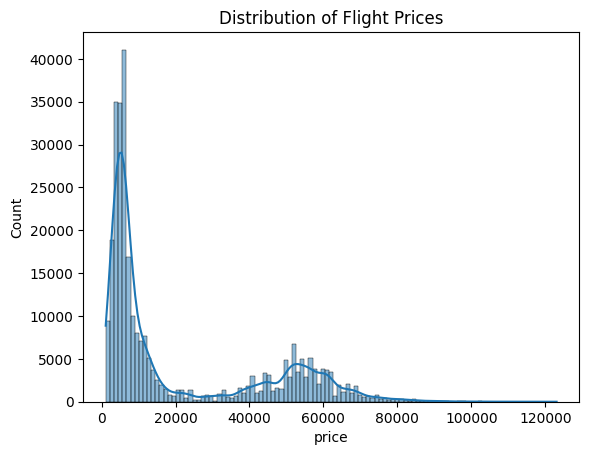

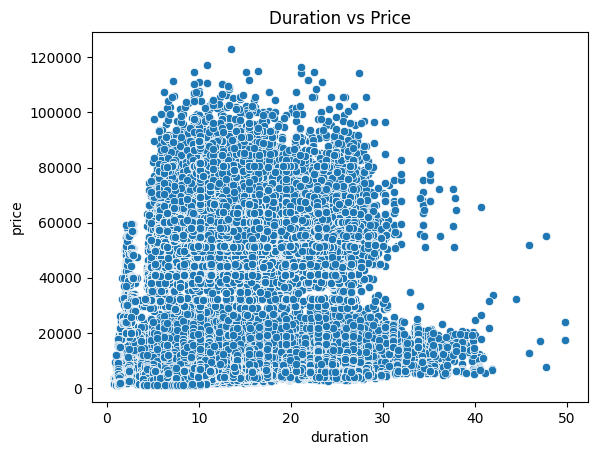

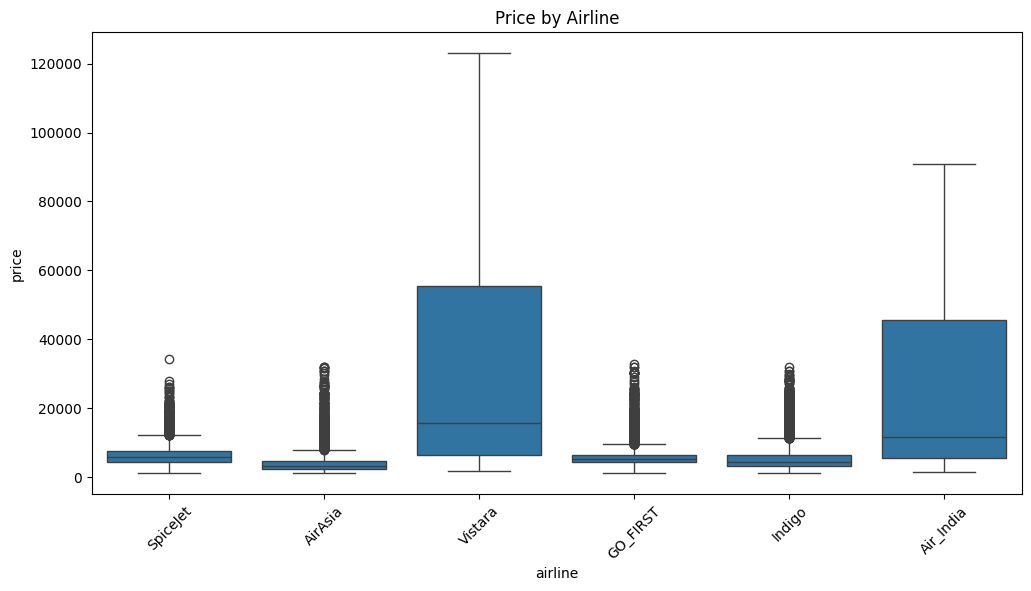

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Flight Prices")
plt.show()

# Duration vs Price
sns.scatterplot(data=df, x='duration', y='price')
plt.title("Duration vs Price")
plt.show()

# # Price by airline
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', y='price')
plt.xticks(rotation=45)
plt.title("Price by Airline")
plt.show()

In [ ]:
import numpy as np
y = np.log1p(df['price'])

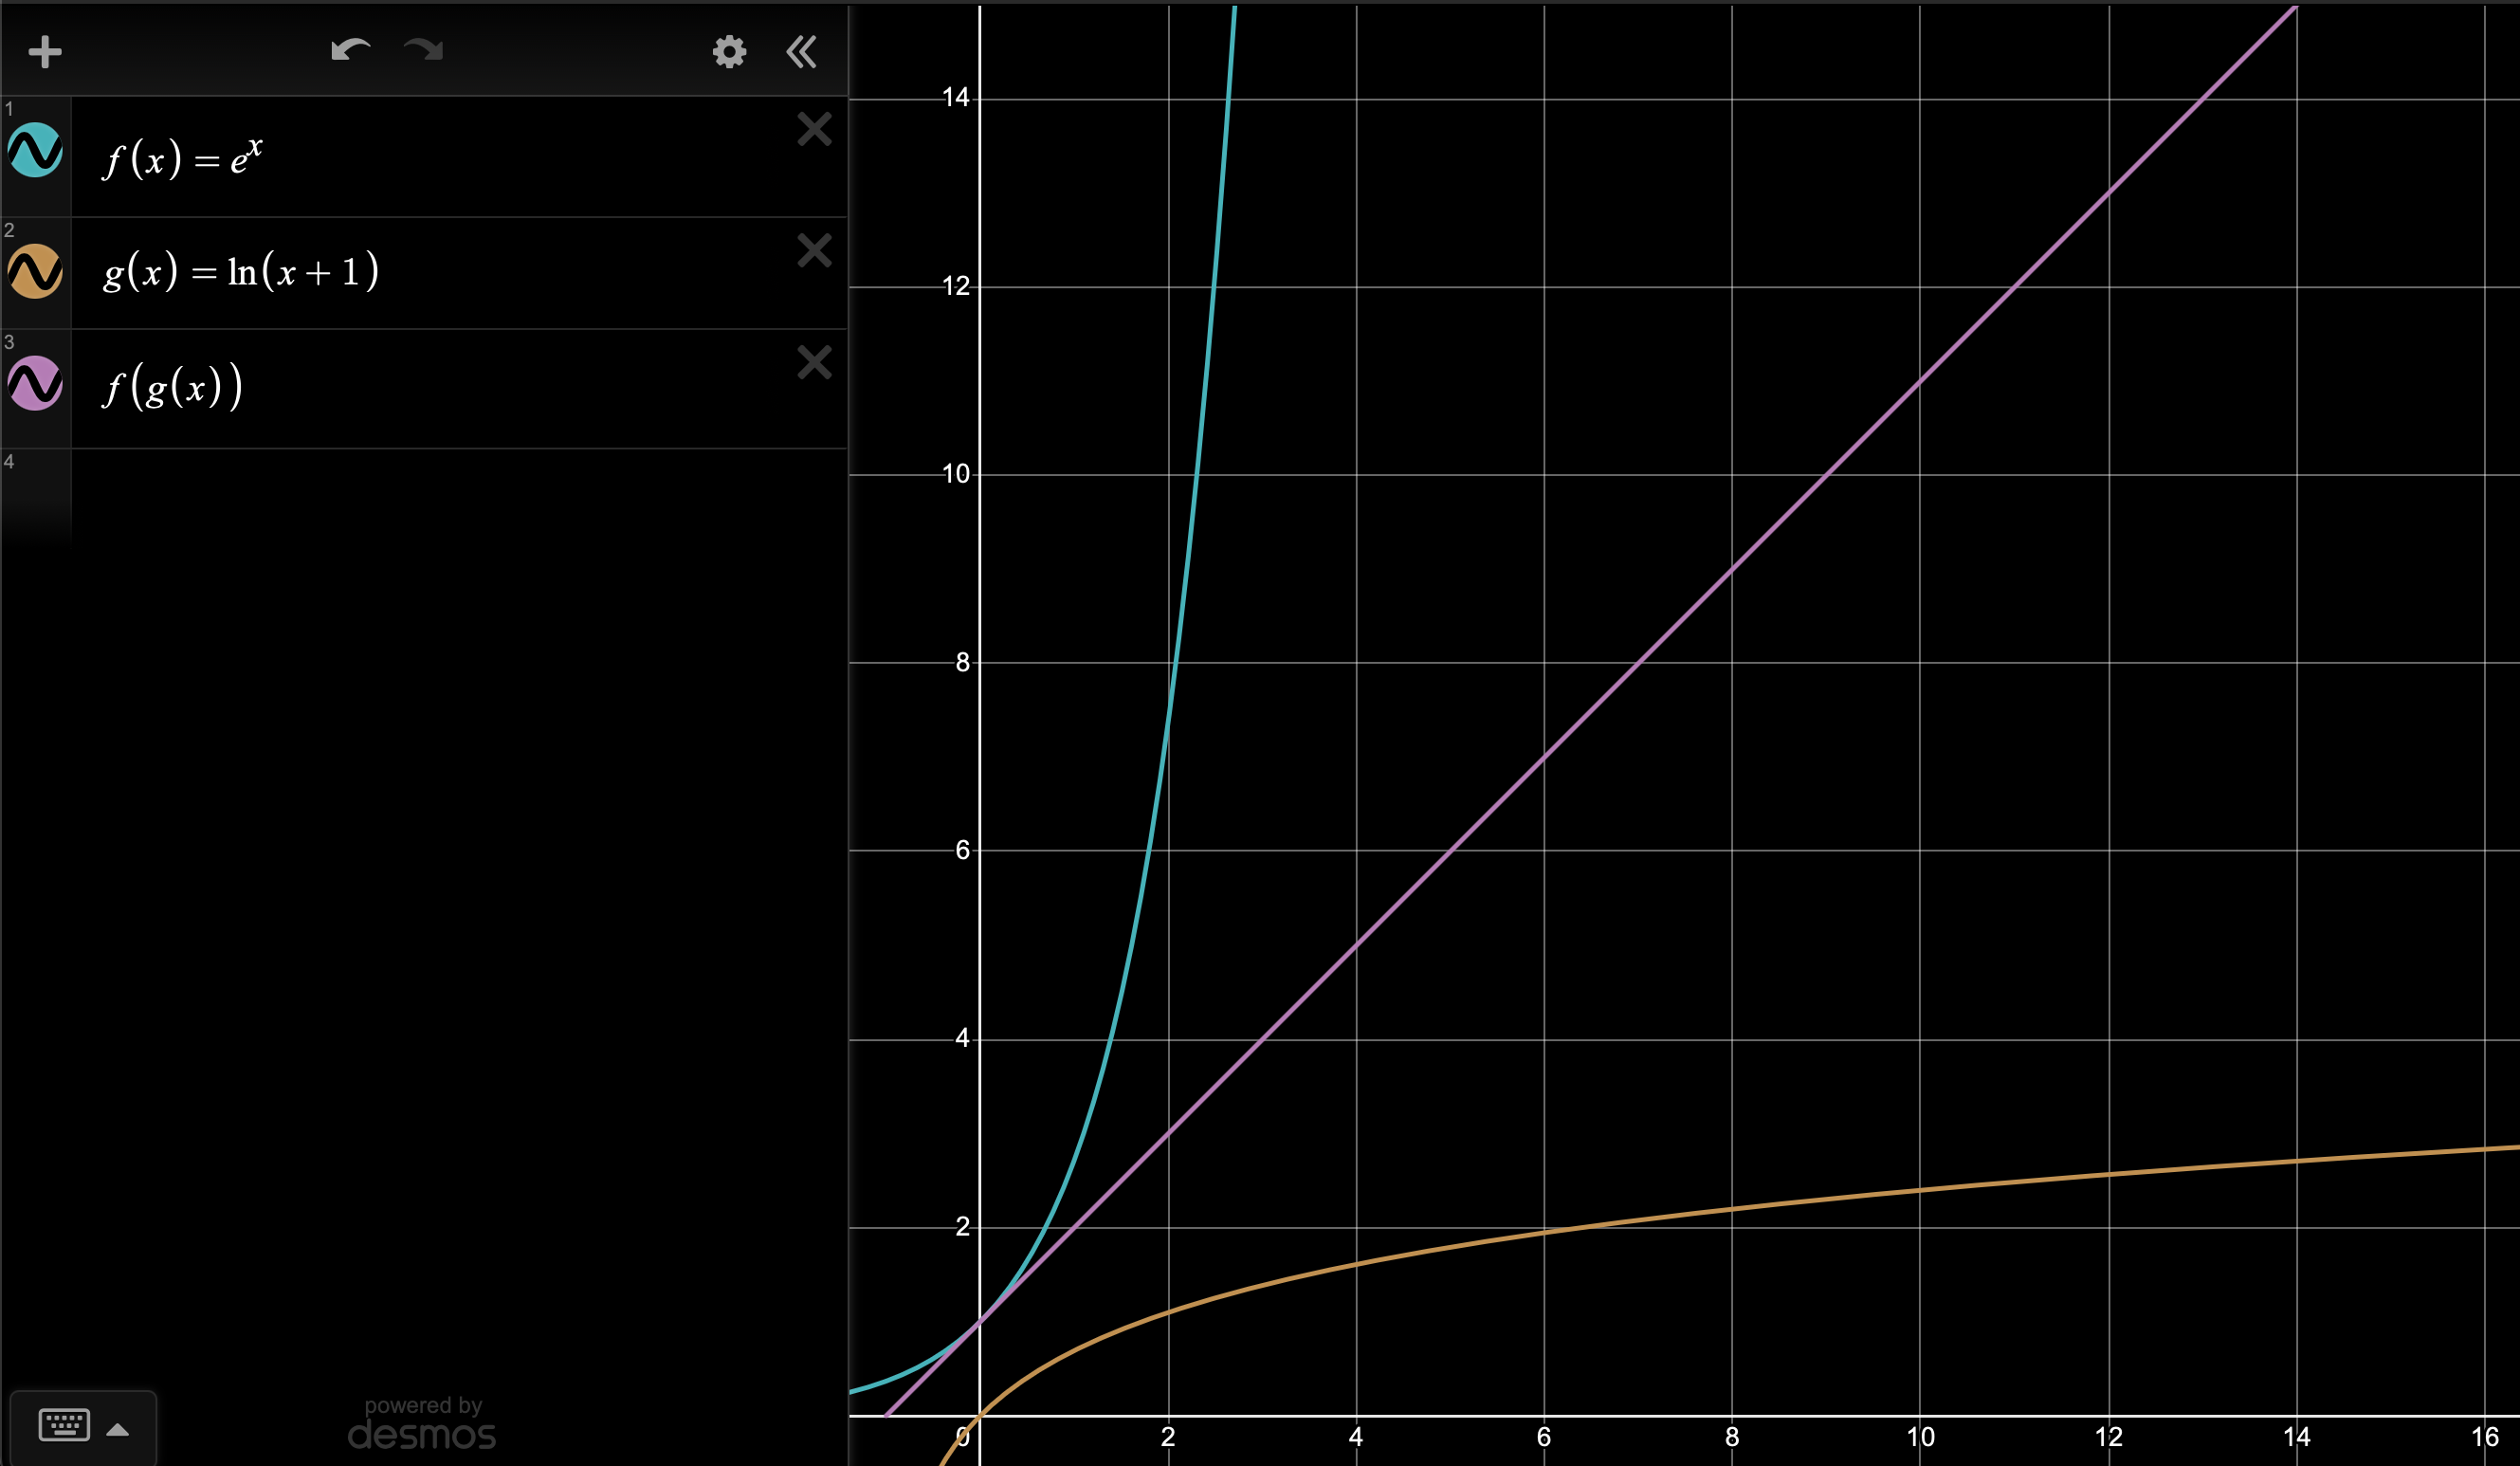

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = np.log1p(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(n_estimators=5, random_state=1)
}

In [ ]:
def regression_accuracy(y_true, y_pred, tolerance=1000):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    correct = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct) * 100

https://www.youtube.com/watch?v=6kEGUCrBEU0

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('regression', model)
    ])

    pipe.fit(X_train, y_train)

    y_pred_log = pipe.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    print(f"{name}\n")

    print(f"Custom Accuracy (within ₹1000): {regression_accuracy(y_true, y_pred):.2f}%")
    print(f"Custom Accuracy (within ₹5000): {regression_accuracy(y_true, y_pred, 5000):.2f}%")
    print(f"Custom Accuracy (within ₹10000): {regression_accuracy(y_true, y_pred, 10000):.2f}%\n")

    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred) ** 0.5:.2f}\n\n")

Linear Regression

Custom Accuracy (within ₹1000): 33.53%
Custom Accuracy (within ₹5000): 75.21%
Custom Accuracy (within ₹10000): 86.53%

R² Score: 0.9026
MAE: 4134.01
RMSE: 7071.48


Decision Tree

Custom Accuracy (within ₹1000): 85.21%
Custom Accuracy (within ₹5000): 93.99%
Custom Accuracy (within ₹10000): 97.73%

R² Score: 0.9825
MAE: 896.10
RMSE: 2998.33


Random Forest

Custom Accuracy (within ₹1000): 81.01%
Custom Accuracy (within ₹5000): 94.90%
Custom Accuracy (within ₹10000): 98.49%

R² Score: 0.9877
MAE: 896.82
RMSE: 2514.40


